### Import modules

In [26]:
import os

import matplotlib.pyplot as plt
import xtgeo

### Setup parameters

In [27]:
project_dir = r"/scratch/fmu/hfle/fmu_sim2seis/realization-0/iter-0"
rel_dir_obs_maps = r"share/observations/maps"
rel_dir_mod_maps = r"share/results/maps"

obs_amplitude_map = "topvolantis--amplitude_mean_depth--20180701_20180101.gri"
obs_relai_map = "topvolantis--relai_mean_depth--20180701_20180101.gri"

mod_amplitude_map = "topvolantis--amplitude_full_mean_depth--20180701_20180101.gri"
mod_relai_map = "topvolantis--relai_full_mean_depth--20180701_20180101.gri"

### Read observed and modelled data

In [28]:
os.chdir(project_dir + os.path.sep + rel_dir_obs_maps)
obs_maps = {
    "amp": xtgeo.surface.surface_from_file(obs_amplitude_map, fformat="irap_binary"),
    "relai": xtgeo.surface.surface_from_file(obs_relai_map, fformat="irap_binary"),
}

os.chdir(project_dir + os.path.sep + rel_dir_mod_maps)
mod_maps = {
    "amp": xtgeo.surface.surface_from_file(mod_amplitude_map, fformat="irap_binary"),
    "relai": xtgeo.surface.surface_from_file(mod_relai_map, fformat="irap_binary"),
}

### Plot attribute maps

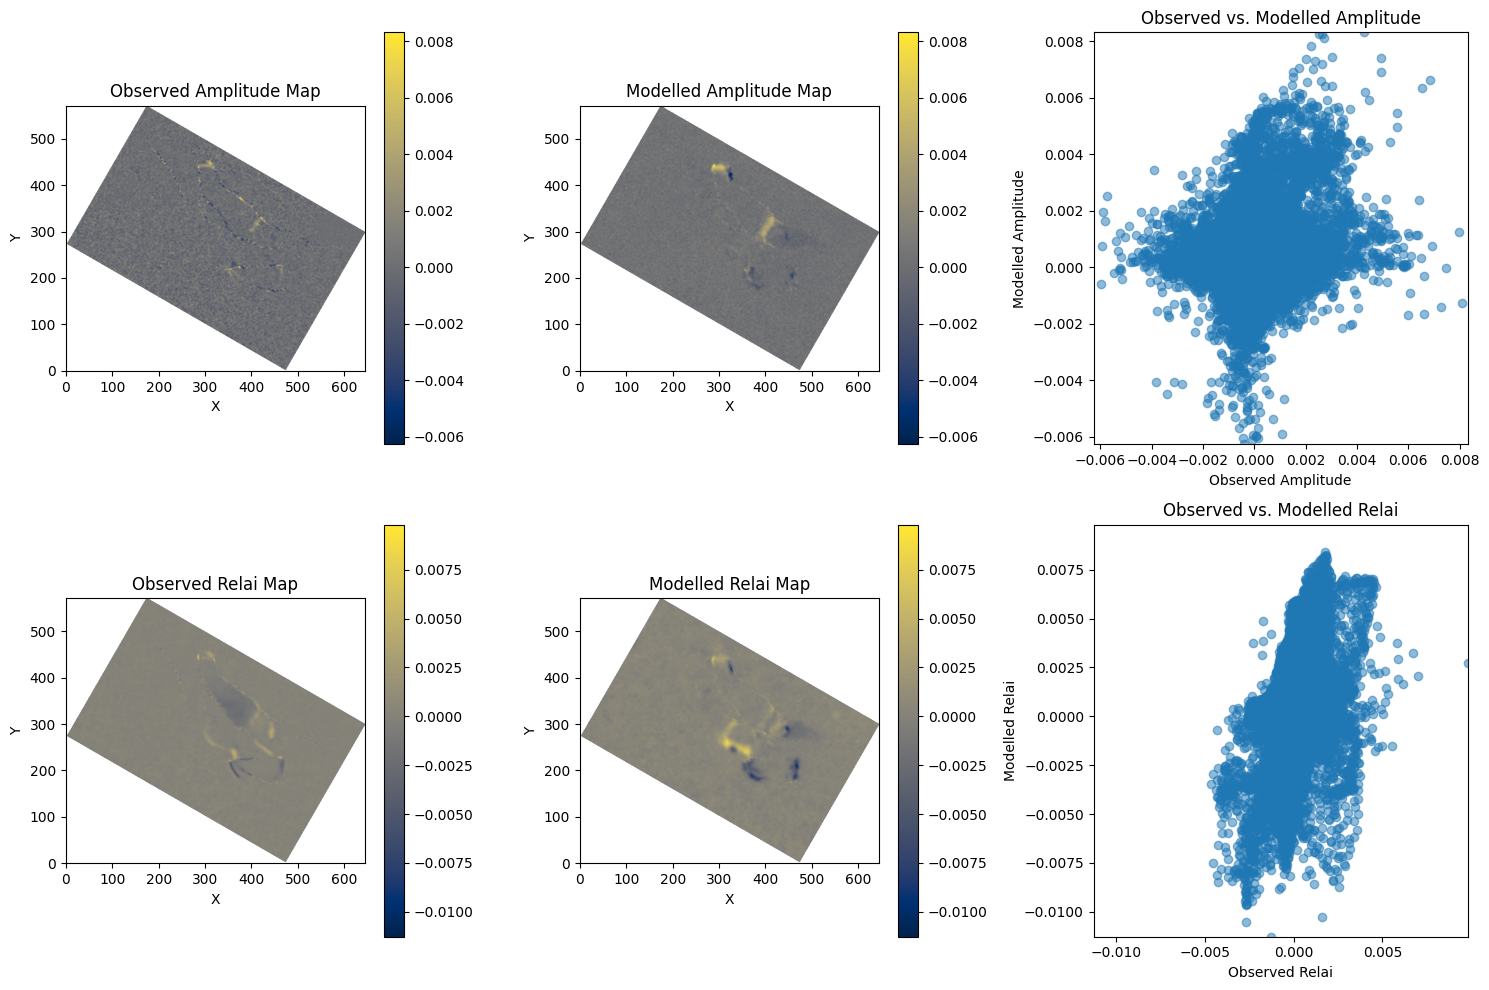

In [29]:
# Calculate the value range for amplitude
amp_min = min(obs_maps["amp"].values.min(), mod_maps["amp"].values.min())
amp_max = max(obs_maps["amp"].values.max(), mod_maps["amp"].values.max())

# Calculate the value range for relai
relai_min = min(obs_maps["relai"].values.min(), mod_maps["relai"].values.min())
relai_max = max(obs_maps["relai"].values.max(), mod_maps["relai"].values.max())

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot observed amplitude map in the first column, first row
im1 = axes[0, 0].imshow(
    obs_maps["amp"].values, cmap="cividis", origin="lower", vmin=amp_min, vmax=amp_max
)
axes[0, 0].set_title("Observed Amplitude Map")
axes[0, 0].set_xlabel("X")
axes[0, 0].set_ylabel("Y")
fig.colorbar(im1, ax=axes[0, 0])

# Plot modelled amplitude map in the second column, first row
im2 = axes[0, 1].imshow(
    mod_maps["amp"].values, cmap="cividis", origin="lower", vmin=amp_min, vmax=amp_max
)
axes[0, 1].set_title("Modelled Amplitude Map")
axes[0, 1].set_xlabel("X")
axes[0, 1].set_ylabel("Y")
fig.colorbar(im2, ax=axes[0, 1])

# Scatterplot of observed vs. modelled amplitude in the third column, first row
axes[0, 2].scatter(
    obs_maps["amp"].values.flatten(), mod_maps["amp"].values.flatten(), alpha=0.5
)
axes[0, 2].set_title("Observed vs. Modelled Amplitude")
axes[0, 2].set_xlabel("Observed Amplitude")
axes[0, 2].set_ylabel("Modelled Amplitude")
axes[0, 2].set_xlim(amp_min, amp_max)
axes[0, 2].set_ylim(amp_min, amp_max)

# Plot observed relai map in the first column, second row
im3 = axes[1, 0].imshow(
    obs_maps["relai"].values,
    cmap="cividis",
    origin="lower",
    vmin=relai_min,
    vmax=relai_max,
)
axes[1, 0].set_title("Observed Relai Map")
axes[1, 0].set_xlabel("X")
axes[1, 0].set_ylabel("Y")
fig.colorbar(im3, ax=axes[1, 0])

# Plot modelled relai map in the second column, second row
im4 = axes[1, 1].imshow(
    mod_maps["relai"].values,
    cmap="cividis",
    origin="lower",
    vmin=relai_min,
    vmax=relai_max,
)
axes[1, 1].set_title("Modelled Relai Map")
axes[1, 1].set_xlabel("X")
axes[1, 1].set_ylabel("Y")
fig.colorbar(im4, ax=axes[1, 1])

# Scatterplot of observed vs. modelled relai in the third column, second row
axes[1, 2].scatter(
    obs_maps["relai"].values.flatten(), mod_maps["relai"].values.flatten(), alpha=0.5
)
axes[1, 2].set_title("Observed vs. Modelled Relai")
axes[1, 2].set_xlabel("Observed Relai")
axes[1, 2].set_ylabel("Modelled Relai")
axes[1, 2].set_xlim(relai_min, relai_max)
axes[1, 2].set_ylim(relai_min, relai_max)

# Adjust layout
plt.tight_layout()
plt.show()